In [2]:
#import magic and libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
#import data set and clean up
charity = pd.read_csv('Charity.csv')
dummies = pd.get_dummies(charity.RenewalsOrAcq)
charity = pd.concat([charity, dummies], axis=1)
charity.drop(['Renewals'], inplace=True, axis=1)
charity.drop(['dob'], inplace=True, axis=1)
charity.drop(['RenewalsOrAcq'], inplace=True, axis=1)
charity.drop(['suburb'], inplace=True, axis=1)
charity.drop(['state'], inplace=True, axis=1)
charity = charity.dropna(subset=['age'])
charity['age'] = charity['age'].convert_objects(convert_numeric=True)
charity = charity.dropna(subset=['age'])
charity['postcode'] = charity['postcode'].astype(str)
charity.postcode.dtype
tax = pd.read_csv('2014tax2.csv')
tax['postcode'] = tax['postcode'].astype(str)
charity_new = pd.merge(charity, tax, on='postcode')
charity_new.head()
burs = pd.read_csv('abs2011combo.csv')
burs['postcode'] = burs['postcode'].astype(str)
charity_plus = pd.merge(charity_new, burs, on='postcode')
charity_plus.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,postcode,num_streets,collection_amount,donation_amount,total_received,age,gender,weekends,profitable,Acq,...,ID_NS_OcMngr,ID_NS_OcProf,ID_NS_OcTechTrdW,ID_NS_OcComPerS,ID_NS_OcClericAdm,ID_NS_OcSalesWk,ID_NS_OcMacOp_Driv,ID_NS_OcLab,ID_NS_OcID_NS,ID_NS_Tot
0,810,2,521.5,0,521.5,67,1,4,1,1,...,8,20,27,15,15,10,19,29,99,242
1,810,2,250.0,0,250.0,57,1,4,1,1,...,8,20,27,15,15,10,19,29,99,242
2,810,4,200.0,0,200.0,53,1,4,1,0,...,8,20,27,15,15,10,19,29,99,242
3,810,2,140.0,0,140.0,59,0,4,1,1,...,8,20,27,15,15,10,19,29,99,242
4,810,2,140.0,0,140.0,74,0,4,1,0,...,8,20,27,15,15,10,19,29,99,242


In [4]:
#have a look at the data
charity_plus.describe(include='all')

,postcode,num_streets,collection_amount,donation_amount,total_received,age,gender,weekends,profitable,Acq,...,ID_NS_OcMngr,ID_NS_OcProf,ID_NS_OcTechTrdW,ID_NS_OcComPerS,ID_NS_OcClericAdm,ID_NS_OcSalesWk,ID_NS_OcMacOp_Driv,ID_NS_OcLab,ID_NS_OcID_NS,ID_NS_Tot
count,26523,26523.000000,26523.000000,26523.000000,26523.000000,26523.000000,26523.000000,26523.000000,26523.000000,26523.000000,...,26523.000000,26523.000000,26523.000000,26523.000000,26523.000000,26523.000000,26523.000000,26523.000000,26523.000000,26523.000000
unique,1728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.883610,77.820176,3.724618,81.544794,62.458621,0.653998,3.352298,0.413377,0.614372,...,19.185575,22.011047,30.580930,12.587641,29.396411,12.072956,15.525054,28.015044,68.304340,237.678996
std,NaN,2.548894,70.843846,18.707591,70.658179,14.072699,0.475703,0.871464,0.492449,0.486752,...,15.259844,18.650248,28.651597,11.534480,24.691946,10.675764,19.228467,29.035638,57.768867,195.882441
min,NaN,0.000000,-414.950000,-150.000000,-500.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1.000000,37.000000,0.000000,40.000000,54.000000,0.000000,2.000000,0.000000,0.000000,...,8.000000,8.000000,11.000000,4.000000,11.000000,4.000000,3.000000,9.000000,29.000000,102.000000
50%,NaN,2.000000,61.000000,0.000000,64.000000,65.000000,1.000000,4.000000,0.000000,1.000000,...,15.000000,18.000000,21.000000,10.000000,23.000000,9.000000,9.000000,18.000000,52.000000,184.000000
75%,NaN,3.000000,100.000000,0.000000,101.000000,72.000000,1.000000,4.000000,1.000000,1.000000,...,26.000000,33.000000,44.000000,17.000000,43.000000,17.000000,20.000000,36.000000,93.000000,318.000000


In [5]:
#K means clustering
from sklearn.cluster import KMeans

np.random.seed(0)

est = KMeans(n_clusters=5, init='random')
est.fit(charity_plus)
y_kmeans = est.predict(charity_plus)



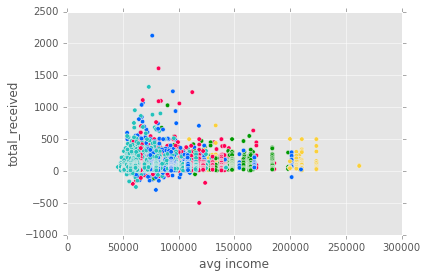

In [6]:
#plot the clusters
colors = np.array(['#FF0054','#FBD039','#23C2BC','#0066ff', '#009900'])
plt.figure()
charity_plus.plot(kind='scatter', x='avg income', y='total_received',c=colors[y_kmeans])

In [7]:
#add clusters back to data
charity_plus['cluster'] = est.predict(charity_plus)


In [8]:
#create smaller df for export for visualisation
col_list = ['postcode','num_streets','age','Acq', 'weekends','profitable','cluster', 'avg income']
#col_l2 = X[250,938,937,37,40]
exportcluster = charity_plus[col_list]
exportcluster.describe()

,num_streets,age,Acq,weekends,profitable,cluster,avg income
count,26523.000000,26523.000000,26523.000000,26523.000000,26523.000000,26523.000000,26523.000000
mean,2.883610,62.458621,0.614372,3.352298,0.413377,2.117898,74126.849441
std,2.548894,14.072699,0.486752,0.871464,0.492449,1.051504,19321.577981
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,45580.474070
25%,1.000000,54.000000,0.000000,2.000000,0.000000,2.000000,62471.509520
50%,2.000000,65.000000,1.000000,4.000000,0.000000,2.000000,68325.239040
75%,3.000000,72.000000,1.000000,4.000000,1.000000,3.000000,79465.611680
max,40.000000,103.000000,1.000000,4.000000,1.000000,4.000000,261782.319000


In [18]:
#exportcluster.to_csv('exportcluster.csv')

In [11]:
centroids = est.cluster_centers_

In [12]:
headers = charity_plus.drop(['cluster'], inplace=True, axis=1)

In [13]:
centroids2 = pd.DataFrame(centroids, columns=charity_plus.columns)
centroids2

,postcode,num_streets,collection_amount,donation_amount,total_received,age,gender,weekends,profitable,Acq,...,ID_NS_OcMngr,ID_NS_OcProf,ID_NS_OcTechTrdW,ID_NS_OcComPerS,ID_NS_OcClericAdm,ID_NS_OcSalesWk,ID_NS_OcMacOp_Driv,ID_NS_OcLab,ID_NS_OcID_NS,ID_NS_Tot
0,3866.092918,2.201155,85.432838,4.660834,90.093672,61.903566,0.654696,3.388749,0.467102,0.607735,...,35.058262,42.316675,54.045455,21.269211,54.072577,21.402813,26.647413,44.938975,113.012054,412.763435
1,2962.466346,1.942308,114.996875,12.586058,127.582933,66.028846,0.682692,3.913462,0.610577,0.735577,...,37.442308,49.879808,12.533654,12.822115,32.932692,13.985577,3.302885,6.149038,53.504808,222.552885
2,4355.342350,3.312423,73.102261,3.333318,76.435579,62.982981,0.655348,3.415934,0.380416,0.609554,...,8.432624,8.467977,16.277481,6.207186,13.138699,5.430650,8.843049,16.410672,36.922470,120.130807
3,3835.371308,2.677469,78.370084,3.422376,81.792460,61.853114,0.652140,3.252627,0.419644,0.622387,...,23.506692,26.643402,38.586771,15.554916,36.945360,15.743834,18.899900,34.444862,84.960734,295.286473
4,3512.735164,2.495128,90.544641,5.425908,95.970549,62.958370,0.646590,3.232950,0.492471,0.603189,...,41.079717,54.065545,41.130204,26.900797,56.408326,20.976971,23.509300,45.879539,118.046944,427.997343


In [14]:
centroids2['avg income']

0     83095.485339
1    156702.097624
2     66143.947881
3     75122.891990
4    105306.699937
Name: avg income, dtype: float64

In [15]:
centroids2['avg donation value']

0     656.201786
1    5498.532469
2     346.168140
3     471.757386
4    1392.673060
Name: avg donation value, dtype: float64

In [ ]:
#Labels:
    #0 = middle of the road - above average incomes, okay returns 
    #1 = old money - high avg incomes, avg charity donations $5.5k each year, older & newer collecters, fewer streets
    #2 = scraping by - collectors in low affluence neighbourhoods often having to chip in themselves to be profitable
    #3 = blue collar collectors - average volunteers, average returns
    #4 = underperformers - well populated, high incomes, modest returns